In [1]:
!pip install tensorflow opencv-python pillow


In [8]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
from IPython.display import display, clear_output


In [9]:
class_labels = {0: 'GO', 1: 'STOP', 2: 'Warning'}

In [10]:
cascade_path = cv2.data.haarcascades + "haarcascade_trafficlight.xml"

cascade_path

'D:\\Anaconda\\Lib\\site-packages\\cv2\\data\\haarcascade_trafficlight.xml'

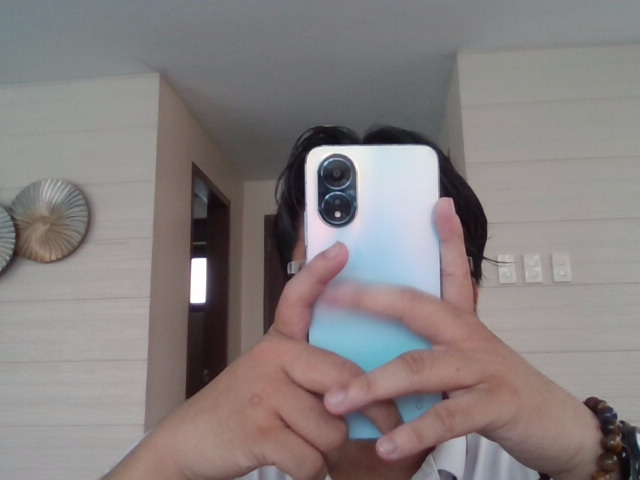

In [ ]:


import cv2
import tensorflow as tf
import numpy as np
from PIL import Image
from IPython.display import display, clear_output

# Load the trained CNN model
model_path = "my_cnn_model_v9.keras"
model = tf.keras.models.load_model(model_path)
print("Model Loaded and Ready for Live Predictions!")

# Class labels
class_labels = {
    0: 'GO',
    1: 'GO LEFT',
    2: 'SLOW',
    3: 'SLOW LEFT',
    4: 'STOP',
    5: 'STOP LEFT'
}


cascade_path = "cascade_haar.xml"
traffic_light_cascade = cv2.CascadeClassifier(cascade_path)


if traffic_light_cascade.empty():
    print("Error: Haar cascade file not loaded. Check the file path.")
    exit()

# Function to preprocess the frame for the model
def preprocess_image(frame, target_size=(64, 64)):
    frame_resized = cv2.resize(frame, target_size)
    frame_array = frame_resized / 255.0  # Normalize pixel values
    return tf.expand_dims(frame_array, axis=0)  # Add batch dimension

# Function to predict the class of the frame
def predict_image(model, preprocessed_image):
    prediction = model.predict(preprocessed_image)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]
    confidence = tf.reduce_max(prediction).numpy()
    return predicted_class, confidence

# Function for live detection and classification
def live_class_detection_in_notebook():
    cap = cv2.VideoCapture(0)  # Open the webcam
    if not cap.isOpened():
        print("Error: Could not open the camera.")
        return

    print("\nStarting live class detection with bounding boxes. Press 'q' to quit.\n")

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not read frame from the camera.")
                break

            # Convert frame to grayscale for Haar cascade
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Detect traffic lights using Haar cascade
            traffic_lights = traffic_light_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            for (x, y, w, h) in traffic_lights:
           
                roi = frame[y:y+h, x:x+w]

                # Preprocess ROI for the classification model
                preprocessed_image = preprocess_image(roi)

                # Predict the class of the detected object
                predicted_class, confidence = predict_image(model, preprocessed_image)
                predicted_label = class_labels.get(predicted_class, 'Unknown')

                # Draw bounding box and label on the frame
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                label = f"{predicted_label} ({confidence:.2f})"
                cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

            # Convert frame to RGB (from BGR used by OpenCV) for display in Jupyter
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(frame_rgb)

            # Display the frame in Jupyter Notebook
            clear_output(wait=True)  # Clear the previous frame
            display(img)

    except KeyboardInterrupt:
        print("\nLive detection interrupted by user.")

    finally:
        cap.release()
        print("\nLive class detection ended.")
 

# Start live detection in Jupyter Notebook
live_class_detection_in_notebook()



In [30]:
!tensorflowjs_converter --input_format=tf_saved_model --saved_model_tags=serve ./saved_model_dir ./model

2024-12-06 16:10:48.994241: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\Anaconda\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "D:\Anaconda\Lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "D:\Anaconda\Lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "D:\Anaconda\Lib\site-packages\tensorflowjs\converters\converter.py", line 38, in <module>
    from tensorflowjs.converters import tf_saved_model_conversion_v2
  File "D:\Anaconda\Lib\site

In [22]:
!pip install tensorflowjs

  Obtaining dependency information for tensorflowjs from https://files.pythonhosted.org/packages/a2/40/c363bdb7ef69b27c941c622b1f6e12eba5e3563abde737690fd1a13969ba/tensorflowjs-4.22.0-py3-none-any.whl.metadata
  Using cached tensorflowjs-4.22.0-py3-none-any.whl.metadata (3.2 kB)
  Obtaining dependency information for flax>=0.7.2 from https://files.pythonhosted.org/packages/50/a2/daca2bc563e1fd53c33fbff1e33e84004639f7ad9e1a9a54370480a7780d/flax-0.10.2-py3-none-any.whl.metadata
  Using cached flax-0.10.2-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for tf-keras>=2.13.0 from https://files.pythonhosted.org/packages/8a/ed/e08afca471299b04a34cd548e64e89d0153eda0e6cf9b715356777e24774/tf_keras-2.18.0-py3-none-any.whl.metadata
  Using cached tf_keras-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorflow_decision_forests-1.8.1-cp311-cp311-win_amd64.whl
  Obtaining dependency information for tensorflow-hub>=0.16.1 from https://files.pythonhosted.org/packages/

In [27]:
!tensorflowjs_converter --input_format keras my_cnn_model_v9.keras ./


2024-12-06 05:34:34.286663: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\Anaconda\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "D:\Anaconda\Lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "D:\Anaconda\Lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "D:\Anaconda\Lib\site-packages\tensorflowjs\converters\converter.py", line 38, in <module>
    from tensorflowjs.converters import tf_saved_model_conversion_v2
  File "D:\Anaconda\Lib\site

In [13]:
import tensorflow as tf
print(tf.__version__)


2.17.0
